# Gender Inequality and the Crime Paradox: Why are there so much fewer women in prison compared to men?



This project aims to investigate gender inequalities in various areas of Portuguese society, namely education, the labor market, income, domestic violence and crime (prisons). It is based on the observation that women, despite having greater academic qualifications and better school performance, face greater difficulties in accessing employment, earn less and are more frequently victims of domestic violence.

Paradoxically, one of the few indicators in which women appear to be better off is their reduced presence in the prison system. However, it is argued here that even this fact is a manifestation of prejudice: the differential treatment of women by the judicial system reflects gender stereotypes that consider them less dangerous or less responsible for their actions. This bias is no more positive than wage inequality or domestic violence — it’s just a different expression of the same systemic inequality.


**Research Questions**
- Are women commiting less crimes and why?

- Is the judicial system biased?

**Hypotheses**
- People with higher education levels commit less crimes.
- Unemployment influences crime rates.
- Lower salaries may increase the likelihood of criminal behavior.
- The justice system can introduce bias in sentencing.

# Data Collection

`Education:`
- Education completion rates by gender (Elementary, Secondary, Higher Education).
- Early school leaving rates by gender.


`Employment and Wages:`
- Unemployment rates by gender.
- Wage differences by gender and sector of activity.
- Types of contracts: precarious vs. stable by gender.

`Domestic Violence:`
- Number of reports and convictions by gender.
- Economic and social impact of victims of domestic violence.

`Crime and Prisons:`
- Incarceration Rates by Gender.
- Types of crimes committed by gender.
- Average length of sentences by gender.

# DATA CLEANING 

`EDUCATION`

5 DataFrames:
- Enrollment rate in primary education (%) (taxa de escolarização do ensino básico)
- Enrollment rate in high school (%) (taxa de escolarização do ensino secundário)
- Enrollment rate in higher education (%) (taxa de escolarização do ensino superior)
- Illiteracy rate (taxa de analfabetismo)
- School dropout rate (taxa de abandono escolar)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [4]:
#df of enrollment rate in primary education (%)
edu_basic = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/educacao/taxaescolarizacaoensinobasico_copy.csv', delimiter=';', header = None)

In [5]:
edu_basic.head()

,0,1,2
0,2023.0,HM,112
1,NaN,H,"112,2"
2,NaN,M,"111,8"
3,2022.0,HM,"110,4"
4,NaN,H,"110,9"


In [6]:
#rename columns
column_names = ['year', 'gender', 'rate']
edu_basic = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/educacao/taxaescolarizacaoensinobasico_copy.csv', delimiter=';', header = None, names=column_names)

In [7]:
edu_basic.head()

,year,gender,rate
0,2023.0,HM,112
1,NaN,H,"112,2"
2,NaN,M,"111,8"
3,2022.0,HM,"110,4"
4,NaN,H,"110,9"


In [8]:
edu_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    20 non-null     float64
 1   gender  60 non-null     object 
 2   rate    60 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


In [9]:
#transform the nan values of the merged cells in the excel in the correct years
#ffill fils the naans with the previous value
edu_basic['year']=edu_basic['year'].fillna(method='ffill')

In [10]:
edu_basic.head()

,year,gender,rate
0,2023.0,HM,112
1,2023.0,H,"112,2"
2,2023.0,M,"111,8"
3,2022.0,HM,"110,4"
4,2022.0,H,"110,9"


In [11]:
#transform the years into ints and not floats
edu_basic['year']=edu_basic['year'].astype(int)

In [12]:
edu_basic.head()

,year,gender,rate
0,2023,HM,112
1,2023,H,"112,2"
2,2023,M,"111,8"
3,2022,HM,"110,4"
4,2022,H,"110,9"


In [13]:
#replace , by . so I can transform rate in float
edu_basic['rate']=edu_basic['rate'].str.replace(',', '.')

In [14]:
edu_basic.head()

,year,gender,rate
0,2023,HM,112
1,2023,H,112.2
2,2023,M,111.8
3,2022,HM,110.4
4,2022,H,110.9


In [15]:
edu_basic['rate']=edu_basic['rate'].astype(float)

In [16]:
edu_basic.head()

,year,gender,rate
0,2023,HM,112.0
1,2023,H,112.2
2,2023,M,111.8
3,2022,HM,110.4
4,2022,H,110.9


In [17]:
edu_basic['gender'].replace({'H': 'men', 'HM' : 'both', 'M' : 'women'}, inplace=True)

In [18]:
edu_basic.head()

,year,gender,rate
0,2023,both,112.0
1,2023,men,112.2
2,2023,women,111.8
3,2022,both,110.4
4,2022,men,110.9


In [19]:
edu_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   gender  60 non-null     object 
 2   rate    60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [20]:
edu_basic.shape

(60, 3)

In [21]:
edu_basic.describe().round(2)

,year,rate
count,60.00,60.00
mean,2013.50,113.84
std,5.81,6.00
min,2004.00,106.80
25%,2008.75,109.40
50%,2013.50,112.05
75%,2018.25,116.55
max,2023.00,129.60


In [25]:
#df of Enrollment rate in high school (%) (taxa de escolarização do ensino secundário)
highschool_names=['year', 'both', 'men', 'women']
edu_highschool = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/educacao/Taxaescolaridadeensinosecundario_copy.csv',delimiter=';',header = 0, names= highschool_names)

In [26]:
type(edu_highschool)

pandas.core.frame.DataFrame

In [27]:
edu_highschool=edu_highschool.dropna()

In [28]:
edu_highschool

,year,both,men,women
0,2024.0,64,"60,1","67,7"
1,2023.0,"61,4","57,4","65,2"
2,2022.0,"61,1","56,8","65,1"
3,2021.0,"59,8","55,9","63,4"
4,2020.0,"57,2","53,5","60,6"
5,2019.0,55,"50,8",59
6,2018.0,"52,5","47,8","56,9"
7,2017.0,"50,7","46,2","54,8"
8,2016.0,"49,6","45,8","53,1"
9,2015.0,48,"44,3","51,4"


In [29]:
edu_highschool['year']= edu_highschool['year'].astype(int)

In [30]:
edu_highschool.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    14 non-null     int64 
 1   both    14 non-null     object
 2   men     14 non-null     object
 3   women   14 non-null     object
dtypes: int64(1), object(3)
memory usage: 560.0+ bytes


In [31]:
edu_highschool

,year,both,men,women
0,2024,64,"60,1","67,7"
1,2023,"61,4","57,4","65,2"
2,2022,"61,1","56,8","65,1"
3,2021,"59,8","55,9","63,4"
4,2020,"57,2","53,5","60,6"
5,2019,55,"50,8",59
6,2018,"52,5","47,8","56,9"
7,2017,"50,7","46,2","54,8"
8,2016,"49,6","45,8","53,1"
9,2015,48,"44,3","51,4"


In [32]:
edu_highschool['both'] = edu_highschool['both'].str.replace(',', '.')

In [33]:
edu_highschool['men'] = edu_highschool['men'].str.replace(',', '.')

In [34]:
edu_highschool['women'] = edu_highschool['women'].str.replace(',', '.')

In [35]:
edu_highschool

,year,both,men,women
0,2024,64,60.1,67.7
1,2023,61.4,57.4,65.2
2,2022,61.1,56.8,65.1
3,2021,59.8,55.9,63.4
4,2020,57.2,53.5,60.6
5,2019,55,50.8,59
6,2018,52.5,47.8,56.9
7,2017,50.7,46.2,54.8
8,2016,49.6,45.8,53.1
9,2015,48,44.3,51.4


In [36]:
edu_highschool['both']= edu_highschool['both'].astype(float)

In [37]:
edu_highschool['men']= edu_highschool['men'].astype(float)

In [38]:
edu_highschool['women']= edu_highschool['women'].astype(float)

In [39]:
edu_highschool.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14 non-null     int64  
 1   both    14 non-null     float64
 2   men     14 non-null     float64
 3   women   14 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 560.0 bytes


In [41]:
#DF of Enrollment rate in higher education (%) (taxa de escolarização do ensino superior)

edu_superior = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/educacao/taxaescolarizacaoensinosuperior_copy.csv', delimiter=';', header = 0)

In [42]:
edu_superior

,year,both,men,women
0,2024.0,"31,4","26,1","36,4"
1,2023.0,"29,8","24,9","34,3"
2,2022.0,"29,5",24,"34,5"
3,2021.0,"28,8","23,1","34,1"
4,2020.0,"27,5","22,3","32,2"
5,2019.0,"26,4","21,7","30,8"
6,2018.0,25,"19,8","29,9"
7,2017.0,"24,1","19,3","28,6"
8,2016.0,"23,8","19,4","27,9"
9,2015.0,"22,9","18,5","26,9"


In [43]:
edu_superior = edu_superior.dropna()

In [44]:
edu_superior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14 non-null     float64
 1   both    14 non-null     object 
 2   men     14 non-null     object 
 3   women   14 non-null     object 
dtypes: float64(1), object(3)
memory usage: 560.0+ bytes


In [45]:
edu_superior

,year,both,men,women
0,2024.0,"31,4","26,1","36,4"
1,2023.0,"29,8","24,9","34,3"
2,2022.0,"29,5",24,"34,5"
3,2021.0,"28,8","23,1","34,1"
4,2020.0,"27,5","22,3","32,2"
5,2019.0,"26,4","21,7","30,8"
6,2018.0,25,"19,8","29,9"
7,2017.0,"24,1","19,3","28,6"
8,2016.0,"23,8","19,4","27,9"
9,2015.0,"22,9","18,5","26,9"


In [46]:
edu_superior['year']=edu_superior['year'].astype(int)

In [47]:
edu_superior['both']=edu_superior['both'].str.replace(',','.')

In [48]:
edu_superior['men']=edu_superior['men'].str.replace(',','.')

In [49]:
edu_superior['women']=edu_superior['women'].str.replace(',','.')

In [50]:
edu_superior['both']=edu_superior['both'].astype(float)

In [51]:
edu_superior['men']=edu_superior['men'].astype(float)

In [52]:
edu_superior['women']=edu_superior['women'].astype(float)

In [53]:
edu_superior

,year,both,men,women
0,2024,31.4,26.1,36.4
1,2023,29.8,24.9,34.3
2,2022,29.5,24.0,34.5
3,2021,28.8,23.1,34.1
4,2020,27.5,22.3,32.2
5,2019,26.4,21.7,30.8
6,2018,25.0,19.8,29.9
7,2017,24.1,19.3,28.6
8,2016,23.8,19.4,27.9
9,2015,22.9,18.5,26.9


In [55]:
#DF Illiteracy rate (taxa de analfabetismo) in 2021

illi = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/educacao/taxaanalfabetismo_copy.csv', delimiter=';', header = 0)

In [56]:
type(illi)

pandas.core.frame.DataFrame

In [57]:
illi = illi.dropna()

In [58]:
illi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   place   4 non-null      object
 1   both    4 non-null      object
 2   men     4 non-null      object
 3   women   4 non-null      object
dtypes: object(4)
memory usage: 160.0+ bytes


In [59]:
illi['both']= illi['both'].str.replace(',', '.')

In [60]:
illi['men'] = illi['men'].str.replace(',', '.')

In [61]:
illi['women'] = illi['women'].str.replace(',', '.')

In [62]:
illi['both']= illi['both'].astype(float)

In [63]:
illi['men']= illi['men'].astype(float)

In [64]:
illi['women']= illi['women'].astype(float)

In [65]:
illi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   place   4 non-null      object 
 1   both    4 non-null      float64
 2   men     4 non-null      float64
 3   women   4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 160.0+ bytes


In [66]:
illi

,place,both,men,women
0,Portugal,3.08,2.10,3.96
1,Continente,3.04,2.03,3.95
2,Acores,3.10,3.40,2.82
3,Madeira,4.51,3.68,5.24


In [67]:
#DF School dropout rate (taxa de abandono escolar)
dropout = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/educacao/taxaabandonoprecoce_copy.csv', delimiter=';', header = 0)

In [68]:
dropout

,year,gender,rate
0,2024.0,HM,"6,6"
1,NaN,H,"7,8"
2,NaN,M,"5,3"
3,2023.0,HM,"8,1"
4,NaN,H,10
...,...,...,...
77,NaN,NaN,NaN
78,NaN,NaN,NaN
79,NaN,NaN,NaN
80,NaN,NaN,NaN


In [69]:
dropout['year'] = dropout['year'].fillna(method='ffill')

In [70]:
dropout

,year,gender,rate
0,2024.0,HM,"6,6"
1,2024.0,H,"7,8"
2,2024.0,M,"5,3"
3,2023.0,HM,"8,1"
4,2023.0,H,10
...,...,...,...
77,2011.0,NaN,NaN
78,2011.0,NaN,NaN
79,2011.0,NaN,NaN
80,2011.0,NaN,NaN


In [71]:
dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    82 non-null     float64
 1   gender  42 non-null     object 
 2   rate    42 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.1+ KB


In [72]:
dropout = dropout.drop(dropout.index[42:])

In [73]:
dropout['gender'].replace({'H': 'Men', 'HM' : 'Both', 'M' : 'Women'}, inplace=True)

In [74]:
dropout['year'] = dropout['year'].astype(int)

In [75]:
dropout['rate']=dropout['rate'].str.replace(',', '.')

In [76]:
dropout['rate']=dropout['rate'].astype(float)

In [77]:
dropout

,year,gender,rate
0,2024,Both,6.6
1,2024,Men,7.8
2,2024,Women,5.3
3,2023,Both,8.1
4,2023,Men,10.0
5,2023,Women,6.1
6,2022,Both,6.3
7,2022,Men,8.4
8,2022,Women,4.1
9,2021,Both,6.4


` EMPLOYMENT `

Datasets:
- number of unemployed people 1997-2023
- gender disparity
- annual gross average salary


In [78]:
unemployment = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/emprego/desemprego.csv', header = 0, delimiter=';')

In [79]:
#rename a specific column
unemployment = unemployment.rename(columns={'Unnamed: 0':'year'})

In [80]:
unemployment = unemployment.dropna()

In [81]:
unemployment = unemployment.astype(int)

In [82]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    27 non-null     int64
 1   Both    27 non-null     int64
 2   Men     27 non-null     int64
 3   Women   27 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [83]:
unemployment

,year,Both,Men,Women
0,2023,317659,142090,175569
1,2022,307005,136218,170787
2,2021,347959,152829,195130
3,2020,402254,179006,223248
4,2019,310482,137120,173362
5,2018,339035,150357,188678
6,2017,403771,184051,219720
7,2016,482556,227209,255347
8,2015,555167,267051,288116
9,2014,598581,291462,307119


In [84]:
disparity = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/emprego/disparidade_salarial.csv', delimiter=';', header=0)

In [85]:
disparity['year'] = disparity['year'].fillna(method='ffill')

In [86]:
disparity['year'] = disparity['year'].astype(int)

In [87]:
disparity['percentage'] = disparity['percentage'].str.replace(',','.')

In [88]:
disparity['percentage'] = disparity['percentage'].astype(float)

In [89]:
disparity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        76 non-null     int64  
 1   activity    76 non-null     object 
 2   percentage  76 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


In [90]:
disparity

,year,activity,percentage
0,2022,Total,6.3
1,2022,Sectores B a N,13.8
2,2022,Industrias extrativas,-11.4
3,2022,Industrias transformadoras,21.0
4,2022,"Electricidade, gas, vapor, agua quente e fria ...",-3.3
...,...,...,...
71,2010,Atividades administrativas e dos servicos de a...,22.0
72,2010,Educacao,12.4
73,2010,Atividades de saude humana e apoio social,35.9
74,2010,"Atividades artisticas, de espetaculos, desport...",57.7


In [91]:
gross_sal=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/emprego/avg_gross_sal_annual.csv', delimiter=';', header=0)

In [92]:
gross_sal['year']= gross_sal['year'].fillna(method='ffill')
gross_sal['year']=gross_sal['year'].astype(int)

In [93]:
gross_sal['activity']=gross_sal['activity'].fillna(method='ffill')

In [94]:
gross_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          228 non-null    int64 
 1   activity      228 non-null    object
 2   gender        228 non-null    object
 3   salary_gross  228 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.3+ KB


In [95]:
gross_sal

,year,activity,gender,salary_gross
0,2022,Total,HM,23153
1,2022,Total,H,24535
2,2022,Total,M,21717
3,2022,Sectores B a N,HM,22265
4,2022,Sectores B a N,H,23697
...,...,...,...,...
223,2010,"Atividades artisticas, de espetaculos, desport...",H,37780
224,2010,"Atividades artisticas, de espetaculos, desport...",M,13783
225,2010,Outras atividades de servicos,HM,13611
226,2010,Outras atividades de servicos,H,15089


` DOMESTIC VIOLENCE `

Datasets:
- victims
- criminals


In [96]:
dv_victims=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/domestic_violence/victims.csv', delimiter=';', header=0)

In [97]:
dv_victims['year']= dv_victims['year'].fillna(method='ffill')
dv_victims['year']=dv_victims['year'].astype(int)

In [98]:
#to find where the complete nan rows start
dv_victims.loc[dv_victims['year']==2008.0]

,year,gender,num_victims
45,2008,HM,21309.0
46,2008,H,2603.0
47,2008,M,18706.0
48,2008,NaN,NaN
49,2008,NaN,NaN
50,2008,NaN,NaN
51,2008,NaN,NaN
52,2008,NaN,NaN
53,2008,NaN,NaN
54,2008,NaN,NaN


In [99]:
dv_victims=dv_victims.drop(dv_victims.index[48:])

In [100]:
dv_victims['num_victims']=dv_victims['num_victims'].astype(int)

In [101]:
dv_victims

,year,gender,num_victims
0,2023,HM,37214
1,2023,H,10309
2,2023,M,26905
3,2022,HM,37696
4,2022,H,10197
5,2022,M,27499
6,2021,HM,31530
7,2021,H,7898
8,2021,M,23632
9,2020,HM,31832


In [102]:
dv_criminals = pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/domestic_violence/criminals.csv', delimiter=';', header=0)

In [103]:
dv_criminals['year']= dv_criminals['year'].fillna(method='ffill')
dv_criminals['year']=dv_criminals['year'].astype(int)
dv_criminals.loc[dv_criminals['year']==2008]

,year,gender,num_criminals
45,2008,HM,20075.0
46,2008,H,17932.0
47,2008,M,2143.0
48,2008,NaN,NaN
49,2008,NaN,NaN
50,2008,NaN,NaN
51,2008,NaN,NaN
52,2008,NaN,NaN
53,2008,NaN,NaN
54,2008,NaN,NaN


In [104]:
dv_criminals=dv_criminals.drop(dv_criminals.index[48:])

In [105]:
dv_criminals['num_criminals']=dv_criminals['num_criminals'].astype(int)

In [106]:
dv_criminals

,year,gender,num_criminals
0,2023,HM,28009
1,2023,H,22406
2,2023,M,5603
3,2022,HM,28309
4,2022,H,22883
5,2022,M,5426
6,2021,HM,24334
7,2021,H,19995
8,2021,M,4339
9,2020,HM,25322


` CRIME & JUSTICE `

Datasets:
- Type of crimes committed by gender
- Identified suspects
- Condemned people
- Number of people encarcerated by education level
- Gender in justice
- Judges by gender


In [107]:
type_crime=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/crime/type_crime.csv', delimiter=';', header=0)

In [108]:
type_crime['year']= type_crime['year'].fillna(method='ffill')
type_crime['year']=type_crime['year'].astype(int)

In [109]:
type_crime['crime_type']= type_crime['crime_type'].fillna(method='ffill')

In [110]:
type_crime

,year,crime_type,gender,num_convicts
0,2023,Total,HM,42324
1,2023,Total,H,36843
2,2023,Total,M,5481
3,2023,Crimes contra as pessoas,HM,7923
4,2023,Crimes contra as pessoas,H,6751
...,...,...,...,...
667,1996,Crimes contra animais de companhia,H,0
668,1996,Crimes contra animais de companhia,M,0
669,1996,Crimes previstos em legislacao penal avulsa,HM,9561
670,1996,Crimes previstos em legislacao penal avulsa,H,8180


In [111]:
identified_sus=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/crime/identified_suspects.csv', delimiter=';', header=0)

In [112]:
identified_sus['year']= identified_sus['year'].fillna(method='ffill')
identified_sus['year']=identified_sus['year'].astype(int)

In [113]:
identified_sus['crime_type']= identified_sus['crime_type'].fillna(method='ffill')

In [114]:
identified_sus['num_identified_suspects'].unique()

array(['153329', '42808', '63217', '23051', '30107', '12024', '161', '82',
       '27231', '2873', '6603', '1039', '715', '344', '25295', '3395',
       '143348', '39049', '60510', '21229', '27661', '10914', '127', '76',
       '25329', '2694', '5917', '842', '738', '396', '23066', '2898',
       '126051', '34032', '55505', '19263', '24325', '8545', '67', '53',
       '19380', '2051', '5719', '1004', '742', '364', '20313', '2752',
       '120710', '31438', '55089', '18019', '24134', '7916', '40',
       '17075', '1758', '5858', '1104', '689', '312', '17812', '2289',
       '131297', '37642', '60756', '21313', '26911', '10625', '17',
       '20574', '2218', '4506', '642', '685', '330', '17825', '2497',
       '132685', '36709', '58181', '19739', '26817', '10757', '25', '20',
       '22016', '2495', '4861', '687', '714', '327', '20071', '2684',
       '135194', '36578', '58737', '19768', '27540', '10726', '22',
       '23821', '2549', '4878', '640', '693', '309', '19503', '2566',
       

In [115]:
#transform null value into nan
identified_sus['num_identified_suspects'].replace('? ?', np.nan, inplace=True)

In [116]:
#convert to int, but keeping the nan values
#errors: allows the conversion to numeric, but transforms the non-numeric in Nan
#Int64: allows the coexistence with of numbers with Nan
identified_sus['num_identified_suspects']= pd.to_numeric(identified_sus['num_identified_suspects'], errors='coerce').astype('Int64')

In [117]:
identified_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     416 non-null    int64 
 1   crime_type               416 non-null    object
 2   gender                   416 non-null    object
 3   num_identified_suspects  402 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 13.5+ KB


In [118]:
identified_sus

,year,crime_type,gender,num_identified_suspects
0,2023,Total,H,153329
1,2023,Total,M,42808
2,2023,Crimes contra as pessoas,H,63217
3,2023,Crimes contra as pessoas,M,23051
4,2023,Crimes contra o patrimonio,H,30107
...,...,...,...,...
411,1998,Crimes contra o Estado,M,188
412,1998,Crimes contra animais de companhia,H,0
413,1998,Crimes contra animais de companhia,M,0
414,1998,Crimes previstos em legislacao avulsa,H,17000


In [119]:
convicted=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/crime/convicted.csv', delimiter=';', header=0)

In [120]:
convicted['year']= convicted['year'].fillna(method='ffill')
convicted['year']=convicted['year'].astype(int)

In [121]:
convicted['type_crime']= convicted['type_crime'].fillna(method='ffill')

In [122]:
convicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          672 non-null    int64 
 1   type_crime    672 non-null    object
 2   gender        672 non-null    object
 3   num_convicts  672 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 21.1+ KB


In [123]:
convicted

,year,type_crime,gender,num_convicts
0,2023,Total,HM,42324
1,2023,Total,H,36843
2,2023,Total,M,5481
3,2023,Crimes contra as pessoas,HM,7923
4,2023,Crimes contra as pessoas,H,6751
...,...,...,...,...
667,1996,Crimes contra animais de companhia,H,0
668,1996,Crimes contra animais de companhia,M,0
669,1996,Crimes previstos em legislacao penal avulsa,HM,9561
670,1996,Crimes previstos em legislacao penal avulsa,H,8180


In [124]:
jail=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/crime/num_jail_edu.csv', delimiter=';', header=0)

In [125]:
jail['year']= jail['year'].fillna(method='ffill')
jail['year']=jail['year'].astype(int)

In [126]:
jail['education_level']= jail['education_level'].fillna(method='ffill')

In [127]:
jail['number']=pd.to_numeric(jail['number'], errors='coerce').astype('Int64')

In [128]:
jail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             510 non-null    int64 
 1   education_level  510 non-null    object
 2   gender           510 non-null    object
 3   number           320 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 16.6+ KB


In [129]:
gender_justice=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/crime/gender_in_justice.csv', delimiter=';', header=0)

In [130]:
gender_justice['year']= gender_justice['year'].fillna(method='ffill')
gender_justice['year']=gender_justice['year'].astype(int)

In [131]:
gender_justice['type']= gender_justice['type'].fillna(method='ffill')

In [132]:
gender_justice['num_people']=pd.to_numeric(gender_justice['num_people'], errors='coerce').astype('Int64')

In [133]:
gender_justice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        816 non-null    int64 
 1   type        816 non-null    object
 2   gender      816 non-null    object
 3   num_people  687 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 26.4+ KB


In [134]:
judges=pd.read_csv('/Users/inesmourato/Documents/AllWomen/FinalProject/crime/judges_by_gender.csv', delimiter=';', header=0)

In [135]:
judges=judges.drop(judges.index[10:])

In [136]:
judges['year']= judges['year'].fillna(method='ffill')
judges['year']=judges['year'].astype(int)

In [137]:
judges['percentage']=judges['percentage'].str.replace(',', '.')

In [138]:
judges['percentage']=judges['percentage'].astype(float)

In [139]:
judges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        10 non-null     int64  
 1   gender      10 non-null     object 
 2   percentage  10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes


# DATA ANALYSIS EDUCATION

In [140]:
print(edu_basic.shape,edu_basic['year'].unique())

(60, 3) [2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010
 2009 2008 2007 2006 2005 2004]


In [141]:
edu_basic.head()

,year,gender,rate
0,2023,both,112.0
1,2023,men,112.2
2,2023,women,111.8
3,2022,both,110.4
4,2022,men,110.9


In [142]:
print(edu_highschool.shape,edu_highschool['year'].unique())

(14, 4) [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011]


In [143]:
edu_highschool.head()

,year,both,men,women
0,2024,64.0,60.1,67.7
1,2023,61.4,57.4,65.2
2,2022,61.1,56.8,65.1
3,2021,59.8,55.9,63.4
4,2020,57.2,53.5,60.6


In [144]:
#to transform the 3 different gender columns in one, like the first dataset
edu_highschool= edu_highschool.melt(id_vars=['year'], var_name='gender', value_name='rate') 

In [145]:
edu_highschool.head()

,year,gender,rate
0,2024,both,64.0
1,2023,both,61.4
2,2022,both,61.1
3,2021,both,59.8
4,2020,both,57.2


In [146]:
edu_highschool = edu_highschool.sort_values(by=['year', 'gender'], ascending=[False, True]).reset_index(drop=True)

In [147]:
edu_highschool.head()

,year,gender,rate
0,2024,both,64.0
1,2024,men,60.1
2,2024,women,67.7
3,2023,both,61.4
4,2023,men,57.4


In [148]:
print(edu_superior.shape ,edu_superior['year'].unique())

(14, 4) [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011]


In [149]:
edu_superior.head()

,year,both,men,women
0,2024,31.4,26.1,36.4
1,2023,29.8,24.9,34.3
2,2022,29.5,24.0,34.5
3,2021,28.8,23.1,34.1
4,2020,27.5,22.3,32.2


In [150]:
edu_superior= edu_superior.melt(id_vars=['year'], var_name='gender', value_name='rate') 

In [151]:
edu_superior = edu_superior.sort_values(by=['year', 'gender'], ascending=[False, True]).reset_index(drop=True)

In [152]:
edu_superior.head()

,year,gender,rate
0,2024,both,31.4
1,2024,men,26.1
2,2024,women,36.4
3,2023,both,29.8
4,2023,men,24.9


In [153]:
print(illi.shape)

(4, 4)


In [154]:
illi

,place,both,men,women
0,Portugal,3.08,2.10,3.96
1,Continente,3.04,2.03,3.95
2,Acores,3.10,3.40,2.82
3,Madeira,4.51,3.68,5.24


In [156]:
illi=illi.drop(illi.index[1:4])


In [157]:
illi

,place,both,men,women
0,Portugal,3.08,2.1,3.96


In [159]:
print(dropout.shape,dropout['year'].unique())

(42, 3) [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011]


In [160]:
dropout.head()

,year,gender,rate
0,2024,Both,6.6
1,2024,Men,7.8
2,2024,Women,5.3
3,2023,Both,8.1
4,2023,Men,10.0


In [161]:
dropout['gender']=dropout['gender'].str.lower()

In [162]:
dropout.head()

,year,gender,rate
0,2024,both,6.6
1,2024,men,7.8
2,2024,women,5.3
3,2023,both,8.1
4,2023,men,10.0


In [163]:
merged_edu=edu_basic.merge(edu_highschool, on=['year', 'gender'], how='inner')

In [164]:
merged_edu=merged_edu.merge(edu_superior, on=['year', 'gender'], how='inner')

In [165]:
merged_edu

,year,gender,rate_x,rate_y,rate
0,2023,both,112.0,61.4,29.8
1,2023,men,112.2,57.4,24.9
2,2023,women,111.8,65.2,34.3
3,2022,both,110.4,61.1,29.5
4,2022,men,110.9,56.8,24.0
5,2022,women,110.0,65.1,34.5
6,2021,both,108.4,59.8,28.8
7,2021,men,109.4,55.9,23.1
8,2021,women,107.4,63.4,34.1
9,2020,both,108.6,57.2,27.5


In [166]:
merged_edu=merged_edu.rename(columns={'rate_x': 'rate_basic'})
merged_edu=merged_edu.rename(columns={'rate_y': 'rate_high_school'})
merged_edu=merged_edu.rename(columns={'rate': 'rate_superior'})

In [167]:
merged_edu=merged_edu.merge(dropout, on=['year', 'gender'], how='inner')

In [168]:
merged_edu=merged_edu.rename(columns={'rate': 'rate_dropout'})

In [169]:
merged_edu

,year,gender,rate_basic,rate_high_school,rate_superior,rate_dropout
0,2023,both,112.0,61.4,29.8,8.1
1,2023,men,112.2,57.4,24.9,10.0
2,2023,women,111.8,65.2,34.3,6.1
3,2022,both,110.4,61.1,29.5,6.3
4,2022,men,110.9,56.8,24.0,8.4
5,2022,women,110.0,65.1,34.5,4.1
6,2021,both,108.4,59.8,28.8,6.4
7,2021,men,109.4,55.9,23.1,8.6
8,2021,women,107.4,63.4,34.1,4.0
9,2020,both,108.6,57.2,27.5,9.1


In [170]:
merged_edu.describe().round(2)

,year,rate_basic,rate_high_school,rate_superior,rate_dropout
count,39.00,39.00,39.00,39.00,39.00
mean,2017.00,111.09,50.75,24.08,13.15
std,3.79,4.15,8.41,5.48,5.98
min,2011.00,106.80,33.90,14.40,4.00
25%,2014.00,108.35,45.05,19.60,8.65
50%,2017.00,109.80,50.80,23.80,12.90
75%,2020.00,111.90,57.05,28.25,16.60
max,2023.00,122.20,65.20,34.50,28.00


In [171]:
#merged_edu.to_csv('merged_edu_clean.csv', index=False)

In [178]:
def find_outliers_iqr(happy):
    for column in merged_edu.select_dtypes(include=[np.number]).columns:  # Only numeric columns
        Q1 = merged_edu[column].quantile(0.25)  # First quartile (25%)
        Q3 = merged_edu[column].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower threshold
        upper_bound = Q3 + 1.5 * IQR  # Upper threshold
        
        # Find outliers
        outliers = merged_edu[(merged_edu[column] < lower_bound) | (merged_edu[column] > upper_bound)][column]
        
        # Print outliers if they exist
        if not outliers.empty:
            print(f"Outliers in column '{column}':")
            print(outliers.to_list(), "\n")
        else:
            print(f"No outliers in column '{column}'.\n")

# Run the function
find_outliers_iqr(merged_edu)

No outliers in column 'year'.

Outliers in column 'rate_basic':
[117.5, 118.7, 121.9, 122.2, 121.6] 

No outliers in column 'rate_high_school'.

No outliers in column 'rate_superior'.

No outliers in column 'rate_dropout'.



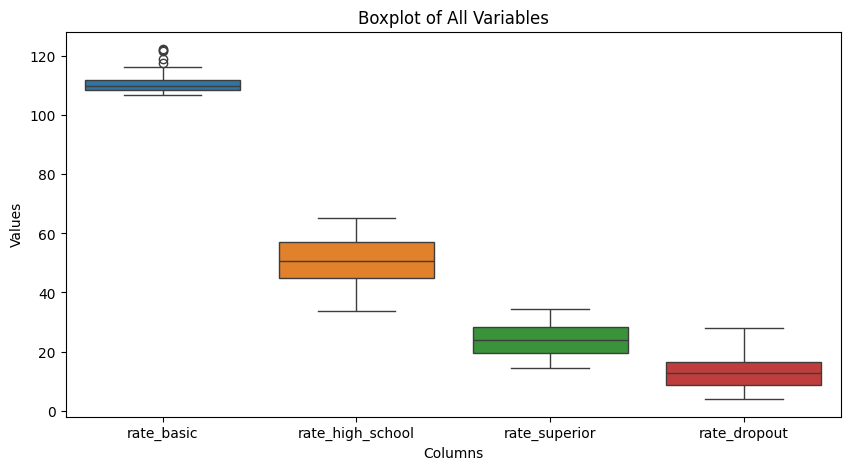

In [179]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_edu.loc[:, 'rate_basic':'rate_dropout'])

plt.title("Boxplot of All Variables")
plt.xlabel("Columns")
plt.ylabel("Values")

plt.show()

In [180]:
outliers_basic = merged_edu[merged_edu['rate_basic'].isin([117.5, 118.7, 121.9, 122.2, 121.6])]
outliers_basic

,year,gender,rate_basic,rate_high_school,rate_superior,rate_dropout
33,2012,both,117.5,40.0,18.4,20.5
34,2012,men,118.7,36.0,15.3,26.7
36,2011,both,121.9,37.3,17.2,22.8
37,2011,men,122.2,33.9,14.4,28.0
38,2011,women,121.6,40.5,19.8,17.6


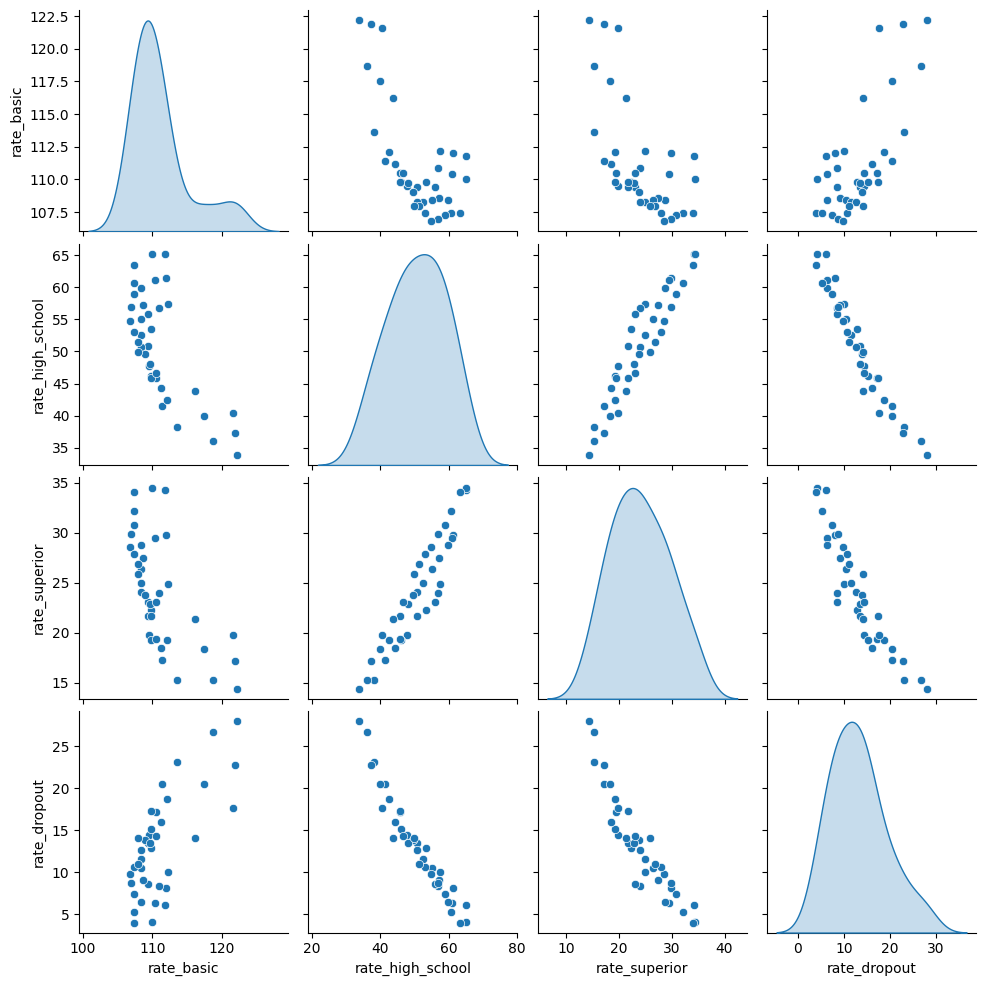

In [181]:
sns.pairplot(merged_edu[["rate_basic", "rate_high_school", "rate_superior", "rate_dropout"]], diag_kind="kde")

plt.show()

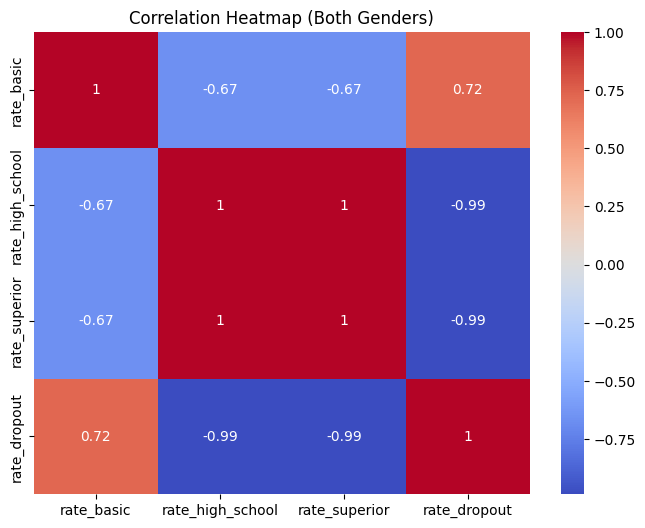

In [182]:


# Your data (from the first message)
data = {'year': [2023, 2023, 2023, 2022, 2022, 2022, 2021, 2021, 2021, 2020, 2020, 2020, 2019, 2019, 2019, 2018, 2018, 2018, 2017, 2017, 2017, 2016, 2016, 2016, 2015, 2015, 2015, 2014, 2014, 2014, 2013, 2013, 2013, 2012, 2012, 2012, 2011, 2011, 2011],
        'gender': ['both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women', 'both', 'men', 'women'],
        'rate_basic': [112.0, 112.2, 111.8, 110.4, 110.9, 110.0, 108.4, 109.4, 107.4, 108.6, 109.8, 107.4, 108.4, 109.4, 107.3, 108.3, 109.5, 107.0, 108.3, 109.8, 106.8, 109.0, 110.5, 107.4, 109.7, 111.2, 108.0, 109.8, 111.4, 108.0, 112.1, 113.6, 110.5, 117.5, 118.7, 116.2, 121.9, 122.2, 121.6],
        'rate_high_school': [61.4, 57.4, 65.2, 61.1, 56.8, 65.1, 59.8, 55.9, 63.4, 57.2, 53.5, 60.6, 55.0, 50.8, 59.0, 52.5, 47.8, 56.9, 50.7, 46.2, 54.8, 49.6, 45.8, 53.1, 48.0, 44.3, 51.4, 45.8, 41.5, 49.9, 42.5, 38.2, 46.6, 40.0, 36.0, 43.8, 37.3, 33.9, 40.5],
        'rate_superior': [29.8, 24.9, 34.3, 29.5, 24.0, 34.5, 28.8, 23.1, 34.1, 27.5, 22.3, 32.2, 26.4, 21.7, 30.8, 25.0, 19.8, 29.9, 24.1, 19.3, 28.6, 23.8, 19.4, 27.9, 22.9, 18.5, 26.9, 21.7, 17.3, 25.9, 19.3, 15.3, 23.1, 18.4, 15.3, 21.4, 17.2, 14.4, 19.8],
        'rate_dropout': [8.1, 10.0, 6.1, 6.3, 8.4, 4.1, 6.4, 8.6, 4.0, 9.1, 12.9, 5.2, 10.5, 13.5, 7.4, 11.6, 14.4, 8.7, 12.6, 15.2, 9.8, 13.9, 17.2, 10.6, 13.5, 16.0, 11.0, 17.3, 20.5, 14.1, 18.7, 23.1, 14.3, 20.5, 26.7, 14.1, 22.8, 28.0, 17.6]}
df = pd.DataFrame(data)

# Convert 'year' to numeric
df['year'] = pd.to_numeric(df['year'])

# Filter for 'both' genders
df_both = df[df['gender'] == 'both'].copy() # Create a copy to avoid SettingWithCopyWarning

# Drop non-numeric columns after filtering
df_both = df_both.drop(['gender', 'year'], axis=1)

def correlation_heatmap(df):
    """
    Creates a correlation heatmap from a Pandas DataFrame.
    """
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap (Both Genders)')
    plt.show()

correlation_heatmap(df_both)


# DATA ANALYSIS EMPLOYMENT

In [183]:
unemployment.head()

,year,Both,Men,Women
0,2023,317659,142090,175569
1,2022,307005,136218,170787
2,2021,347959,152829,195130
3,2020,402254,179006,223248
4,2019,310482,137120,173362


In [184]:
unemployment['year'].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997])

In [185]:
unemployment= unemployment.melt(id_vars=['year'], var_name='gender', value_name='rate') 

In [186]:
unemployment = unemployment.sort_values(by=['year', 'gender'], ascending=[False, True]).reset_index(drop=True)

In [187]:
unemployment['gender']=unemployment['gender'].str.lower()

In [188]:
unemployment

,year,gender,rate
0,2023,both,317659
1,2023,men,142090
2,2023,women,175569
3,2022,both,307005
4,2022,men,136218
...,...,...,...
76,1998,men,155872
77,1998,women,228186
78,1997,both,420756
79,1997,men,174822


In [189]:
unemployment.to_csv('unemployment_clean.csv', index=False)

In [190]:
disparity.loc[disparity['year']==2022]

,year,activity,percentage
0,2022,Total,6.3
1,2022,Sectores B a N,13.8
2,2022,Industrias extrativas,-11.4
3,2022,Industrias transformadoras,21.0
4,2022,"Electricidade, gas, vapor, agua quente e fria ...",-3.3
5,2022,"Captacao, tratamento e distribuicao de agua - ...",-20.4
6,2022,Construcao,-8.0
7,2022,Comercio por grosso e a retalho - reparacao d...,8.6
8,2022,Transportes e armazenagem,-11.3
9,2022,"Alojamento, restauracao e similares",15.9


In [191]:
disparity.loc[disparity['activity']=='Total']

,year,activity,percentage
0,2022,Total,6.3
19,2018,Total,8.9
38,2014,Total,14.9
57,2010,Total,12.8


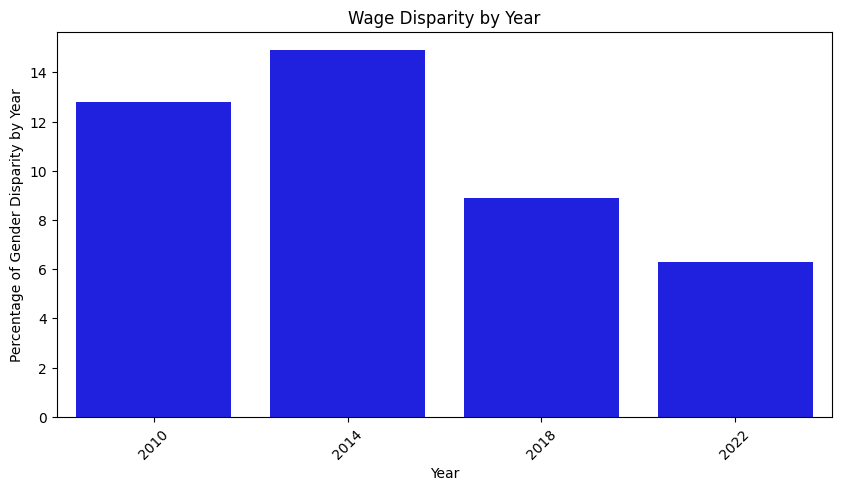

In [192]:
plt.figure(figsize=(10, 5))
disp_total=disparity.loc[disparity['activity']=='Total']
sns.barplot(data=disp_total, x='year', y='percentage', color='blue')

plt.title('Wage Disparity by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Gender Disparity by Year')
plt.xticks(rotation=45)


plt.show()

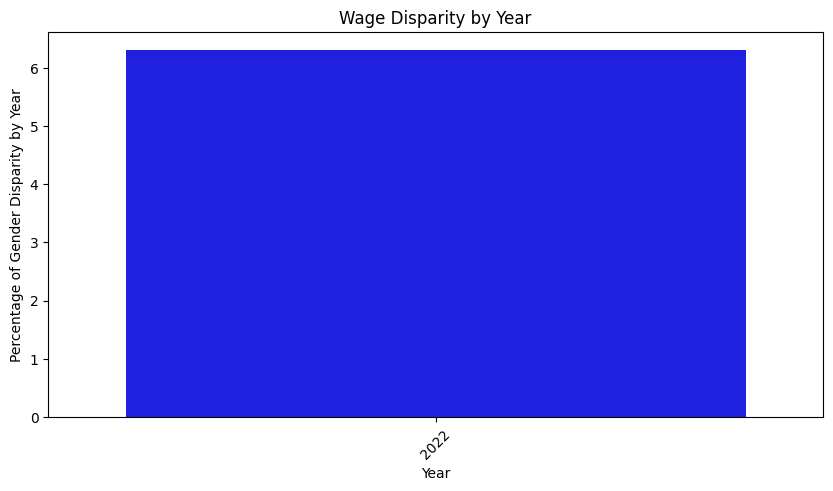

In [194]:
plt.figure(figsize=(10, 5))
disp_total=disparity.loc[(disparity['activity']=='Total') & (disparity['year']==2022)]
sns.barplot(data=disp_total, x='year', y='percentage', color='blue')

plt.title('Wage Disparity by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Gender Disparity by Year')
plt.xticks(rotation=45)


plt.show()

In [191]:
disparity.loc[(disparity['activity']=='Educacao') | (disparity['activity']=='Construcao')]

,year,activity,percentage
6,2022,Construcao,-8.0
15,2022,Educacao,8.2
25,2018,Construcao,-10.3
34,2018,Educacao,18.0
44,2014,Construcao,-5.4
53,2014,Educacao,10.3
63,2010,Construcao,-20.2
72,2010,Educacao,12.4


In [192]:
disparity.loc[(disparity['activity']=='Educacao') | (disparity['activity']=='Construcao') | (disparity['activity']=='Transportes e armazenagem') | (disparity['activity']=='Atividades de saude humana e apoio social')	]


,year,activity,percentage
6,2022,Construcao,-8.0
8,2022,Transportes e armazenagem,-11.3
15,2022,Educacao,8.2
16,2022,Atividades de saude humana e apoio social,24.1
25,2018,Construcao,-10.3
27,2018,Transportes e armazenagem,-19.0
34,2018,Educacao,18.0
35,2018,Atividades de saude humana e apoio social,25.7
44,2014,Construcao,-5.4
46,2014,Transportes e armazenagem,-22.0


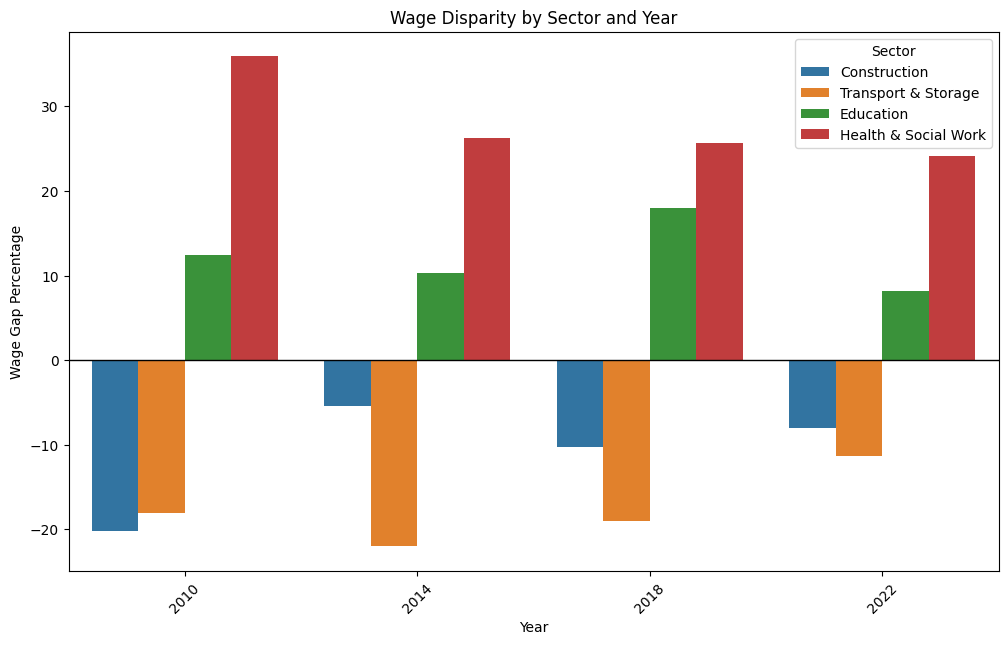

In [193]:

disp_edu=disparity.loc[(disparity['activity']=='Educacao') | (disparity['activity']=='Construcao') | (disparity['activity']=='Transportes e armazenagem') | (disparity['activity']=='Atividades de saude humana e apoio social')	]
custom_labels = {
    'Educacao': 'Education',
    'Construcao': 'Construction',
    'Transportes e armazenagem': 'Transport & Storage',
    'Atividades de saude humana e apoio social': 'Health & Social Work'}
    
plt.figure(figsize=(12, 7))
# Create the bar plot
sns.barplot(data=disp_edu, x='year', y='percentage', hue='activity')

# Add labels and title
plt.title('Wage Disparity by Sector and Year')
plt.xlabel('Year')
plt.ylabel('Wage Gap Percentage')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=1)  # Add a line at 0 for reference
plt.legend(title='Sector')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [custom_labels[label] for label in labels], title='Sector')

plt.show()

In [194]:
gross_sal

,year,activity,gender,salary_gross
0,2022,Total,HM,23153
1,2022,Total,H,24535
2,2022,Total,M,21717
3,2022,Sectores B a N,HM,22265
4,2022,Sectores B a N,H,23697
...,...,...,...,...
223,2010,"Atividades artisticas, de espetaculos, desport...",H,37780
224,2010,"Atividades artisticas, de espetaculos, desport...",M,13783
225,2010,Outras atividades de servicos,HM,13611
226,2010,Outras atividades de servicos,H,15089


In [195]:
disparity

,year,activity,percentage
0,2022,Total,6.3
1,2022,Sectores B a N,13.8
2,2022,Industrias extrativas,-11.4
3,2022,Industrias transformadoras,21.0
4,2022,"Electricidade, gas, vapor, agua quente e fria ...",-3.3
...,...,...,...
71,2010,Atividades administrativas e dos servicos de a...,22.0
72,2010,Educacao,12.4
73,2010,Atividades de saude humana e apoio social,35.9
74,2010,"Atividades artisticas, de espetaculos, desport...",57.7


In [196]:
merged_empl=disparity.merge(gross_sal, on =['year', 'activity'], how='inner')

In [197]:
#merged_empl.to_csv('merged_employment.csv', index=False)

In [198]:
merged_empl.loc[merged_empl['activity']=='Total']

,year,activity,percentage,gender,salary_gross
0,2022,Total,6.3,HM,23153
1,2022,Total,6.3,H,24535
2,2022,Total,6.3,M,21717
57,2018,Total,8.9,HM,18236
58,2018,Total,8.9,H,19624
59,2018,Total,8.9,M,16840
114,2014,Total,14.9,HM,17208
115,2014,Total,14.9,H,18830
116,2014,Total,14.9,M,15638
171,2010,Total,12.8,HM,16776


In [199]:
dv_victims

,year,gender,num_victims
0,2023,HM,37214
1,2023,H,10309
2,2023,M,26905
3,2022,HM,37696
4,2022,H,10197
5,2022,M,27499
6,2021,HM,31530
7,2021,H,7898
8,2021,M,23632
9,2020,HM,31832


In [200]:
dv_criminals

,year,gender,num_criminals
0,2023,HM,28009
1,2023,H,22406
2,2023,M,5603
3,2022,HM,28309
4,2022,H,22883
5,2022,M,5426
6,2021,HM,24334
7,2021,H,19995
8,2021,M,4339
9,2020,HM,25322


In [201]:
merged_dv=dv_victims.merge(dv_criminals, on=['year', 'gender'], how='inner')

In [202]:
merged_dv['gender']=merged_dv['gender'].str.replace('HM', 'both')

In [203]:
merged_dv['gender']=merged_dv['gender'].str.replace('H', 'men')
merged_dv['gender']=merged_dv['gender'].str.replace('M', 'women')

In [204]:
merged_dv.to_csv('merged_dv.csv', index=False)

In [205]:
identified_sus['gender']=identified_sus['gender'].replace({'H':'men', 'M':'women'})

In [206]:
identified_sus

,year,crime_type,gender,num_identified_suspects
0,2023,Total,men,153329
1,2023,Total,women,42808
2,2023,Crimes contra as pessoas,men,63217
3,2023,Crimes contra as pessoas,women,23051
4,2023,Crimes contra o patrimonio,men,30107
...,...,...,...,...
411,1998,Crimes contra o Estado,women,188
412,1998,Crimes contra animais de companhia,men,0
413,1998,Crimes contra animais de companhia,women,0
414,1998,Crimes previstos em legislacao avulsa,men,17000


In [207]:
convicted=convicted.rename(columns={'type_crime':'crime_type'})
convicted['gender']=convicted['gender'].replace({'HM':'both', 'H':'men', 'M':'women'})

In [224]:
convicted.loc[convicted['year']==2023]

,year,crime_type,gender,num_convicts
0,2023,Total,both,42324
1,2023,Total,men,36843
2,2023,Total,women,5481
3,2023,Crimes contra as pessoas,both,7923
4,2023,Crimes contra as pessoas,men,6751
5,2023,Crimes contra as pessoas,women,1172
6,2023,Crimes contra o patrimonio,both,6202
7,2023,Crimes contra o patrimonio,men,4779
8,2023,Crimes contra o patrimonio,women,1423
9,2023,Crimes contra a vida em sociedade,both,11341


In [225]:
identified_sus.loc[identified_sus['year']==2023]

,year,crime_type,gender,num_identified_suspects
0,2023,Total,men,153329
1,2023,Total,women,42808
2,2023,Crimes contra as pessoas,men,63217
3,2023,Crimes contra as pessoas,women,23051
4,2023,Crimes contra o patrimonio,men,30107
5,2023,Crimes contra o patrimonio,women,12024
6,2023,Crimes contra a identidade cultural e integrid...,men,161
7,2023,Crimes contra a identidade cultural e integrid...,women,82
8,2023,Crimes contra a vida em sociedade,men,27231
9,2023,Crimes contra a vida em sociedade,women,2873


In [226]:
merged_jus=pd.merge(convicted, identified_sus, on=['year', 'crime_type', 'gender'], how='inner')

In [227]:
merged_jus

,year,crime_type,gender,num_convicts,num_identified_suspects
0,2023,Total,men,36843,153329
1,2023,Total,women,5481,42808
2,2023,Crimes contra as pessoas,men,6751,63217
3,2023,Crimes contra as pessoas,women,1172,23051
4,2023,Crimes contra o patrimonio,men,4779,30107
...,...,...,...,...,...
307,1998,Crimes contra a vida em sociedade,women,457,1041
308,1998,Crimes contra o Estado,men,2256,2736
309,1998,Crimes contra o Estado,women,188,188
310,1998,Crimes contra animais de companhia,men,0,0


In [228]:
merged_jus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   year                     312 non-null    int64 
 1   crime_type               312 non-null    object
 2   gender                   312 non-null    object
 3   num_convicts             312 non-null    int64 
 4   num_identified_suspects  305 non-null    Int64 
dtypes: Int64(1), int64(2), object(2)
memory usage: 12.6+ KB


In [235]:
merged_jus.to_csv('merged_justice.csv', index=False)

In [229]:
jail

,year,education_level,gender,number
0,2023,Total,HM,12193
1,2023,Total,H,11287
2,2023,Total,M,906
3,2023,Nenhum,HM,809
4,2023,Nenhum,H,694
...,...,...,...,...
505,1990,Secundario,H,<NA>
506,1990,Secundario,M,<NA>
507,1990,Superior,HM,100
508,1990,Superior,H,<NA>


In [230]:
jail['gender']=jail['gender'].replace({'HM':'both', 'H':'men', 'M':'women'})

In [231]:
jail

,year,education_level,gender,number
0,2023,Total,both,12193
1,2023,Total,men,11287
2,2023,Total,women,906
3,2023,Nenhum,both,809
4,2023,Nenhum,men,694
...,...,...,...,...
505,1990,Secundario,men,<NA>
506,1990,Secundario,women,<NA>
507,1990,Superior,both,100
508,1990,Superior,men,<NA>


In [232]:
jail.loc[jail['year']==2023]

,year,education_level,gender,number
0,2023,Total,both,12193
1,2023,Total,men,11287
2,2023,Total,women,906
3,2023,Nenhum,both,809
4,2023,Nenhum,men,694
5,2023,Nenhum,women,115
6,2023,Basico,both,8908
7,2023,Basico,men,8412
8,2023,Basico,women,496
9,2023,Secundario,both,1948


In [236]:
jail_total=jail.loc[jail['education_level']=='Total']

In [237]:
jail_total.to_csv('jail_total.csv', index=False)

In [245]:
gender_justice['gender']=gender_justice['gender'].replace({'HM':'both', 'H':'men', 'M':'women'})

In [246]:
gender_justice

,year,type,gender,num_people
0,2023,Magistradas/os Judiciais,both,2100
1,2023,Magistradas/os Judiciais,men,727
2,2023,Magistradas/os Judiciais,women,1373
3,2023,Magistradas/os do Ministerio Publico,both,1520
4,2023,Magistradas/os do Ministerio Publico,men,458
...,...,...,...,...
811,1990,Oficiais dos registos e do notariado,men,<NA>
812,1990,Oficiais dos registos e do notariado,women,<NA>
813,1990,Pessoal ao servico nas policias e outros organ...,both,35512
814,1990,Pessoal ao servico nas policias e outros organ...,men,<NA>


In [250]:
gender_justice.to_csv('gender_in_justice.csv', index=False)

In [240]:
gender_justice.loc[gender_justice['year']==2023]

,year,type,gender,num_people
0,2023,Magistradas/os Judiciais,HM,2100
1,2023,Magistradas/os Judiciais,H,727
2,2023,Magistradas/os Judiciais,M,1373
3,2023,Magistradas/os do Ministerio Publico,HM,1520
4,2023,Magistradas/os do Ministerio Publico,H,458
5,2023,Magistradas/os do Ministerio Publico,M,1062
6,2023,Advogadas/os,HM,36634
7,2023,Advogadas/os,H,16030
8,2023,Advogadas/os,M,20604
9,2023,Solicitadoras/es,HM,4250


In [247]:
judges['gender']=judges['gender'].replace({ 'H':'men', 'M':'women'})

In [251]:
judges.to_csv('judges_gender.csv', index=False)

In [242]:
merged_jus.to_csv('merged_jus.csv', index=False)

In [243]:
jail

,year,education_level,gender,number
0,2023,Total,both,12193
1,2023,Total,men,11287
2,2023,Total,women,906
3,2023,Nenhum,both,809
4,2023,Nenhum,men,694
...,...,...,...,...
505,1990,Secundario,men,<NA>
506,1990,Secundario,women,<NA>
507,1990,Superior,both,100
508,1990,Superior,men,<NA>


In [244]:
jail.to_csv('jail.csv', index=False)